# LAPTOP PRICE AND SPECS ANALYSIS PREOJECT

This project analyzes laptop specifications and how they affect pricing.  
We'll explore how features like RAM, storage, processor, and brand contribute to price differences across various laptops.

**Goals:**
- Clean and process laptop spec data
- Explore relationships between features and price
- Visualize trends and insights


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual theme
sns.set(style="whitegrid")


## 📥 Load the Dataset

Load and preview the laptop dataset.


In [2]:
# Load the CSV file
df = pd.read_csv("laptop_data/laptop_data.csv")

# Show top 5 rows
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'laptop_data/laptop_data.csv'

## ⬇️ Download the Dataset

Let's download the dataset from a public source.

In [3]:
!wget https://raw.githubusercontent.com/campusx-official/laptop-price-predictor-regression-project/main/laptop_data.csv -O laptop_data.csv

--2025-07-01 14:06:06--  https://raw.githubusercontent.com/campusx-official/laptop-price-predictor-regression-project/main/laptop_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182053 (178K) [text/plain]
Saving to: ‘laptop_data.csv’

laptop_data.csv     100%[===================>] 177.79K  --.-KB/s    in 0.01s   

2025-07-01 14:06:06 (12.5 MB/s) - ‘laptop_data.csv’ saved [182053/182053]



## 📥 Load the Dataset

Load and preview the laptop dataset.

In [4]:
# Load the CSV file
df = pd.read_csv("laptop_data.csv")

# Show top 5 rows
display(df.head())

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## 🔍 Dataset Overview

Let's explore the structure, data types, and values of each column using basic Pandas functions.


In [5]:
df.shape

(1303, 12)

In [6]:
df.columns


Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [7]:
df.dtypes

,0
Unnamed: 0,int64
Company,object
TypeName,object
Inches,float64
ScreenResolution,object
Cpu,object
Ram,object
Memory,object
Gpu,object
OpSys,object


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [9]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [10]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [11]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [12]:
df.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
838,838,Lenovo,Notebook,14.0,1366x768,Intel Celeron Quad Core N3160 1.6GHz,4GB,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.5kg,17316.00
727,727,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i3 7100U 2.4GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,1.71kg,34578.72
1210,1210,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.2GHz,8GB,512GB Flash Storage,Intel HD Graphics 515,Mac OS X,0.920kg,68145.12
485,485,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.75kg,55890.72
334,334,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.5kg,53226.72


In [13]:
df.isnull().sum()

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df['Company'].nunique()

19

In [16]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [17]:
# 13. Count laptops by company
df['Company'].value_counts()

,count
Company,
Dell,297
Lenovo,297
HP,274
Asus,158
Acer,103
MSI,54
Toshiba,48
Apple,21
Samsung,9


In [20]:
# 14. Most common OS
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [21]:
# 15. Most common CPU
df['Cpu'].value_counts().head()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72


In [22]:
# 16. Most common GPU
df['Gpu'].value_counts().head()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48


In [23]:
# 17. Unique RAM values
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [25]:
# 18. Unique Memory types
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [26]:
# 19. Max and min price
df['Price'].max(), df['Price'].min()

(324954.72, 9270.72)

In [27]:
# 20. Average price
df['Price'].mean()

np.float64(59870.042910207216)

## 🧹 Data Cleaning Plan

Some columns like `Ram`, `Memory`, and `Weight` contain units (e.g., "GB", "kg") as strings.  
We will:
- Remove units and convert to numeric
- Clean mixed storage info (e.g., "128GB SSD + 1TB HDD")
- Extract CPU and GPU brands


## 🧹 Data Cleaning

Clean `Ram`, `Weight`, and split complex `Memory` values into SSD and HDD.


In [41]:
print(df['Ram'].dtype)
print(df['Ram'].unique())


int64
[ 8 16  4  2 12  6 32 24 64]


In [45]:
if df['Ram'].dtype == 'object':
    df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)


In [46]:
# 1. Clean RAM column (only if needed)
if df['Ram'].dtype == 'object':
    df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

In [48]:
# 2. Clean Weight column
df['Weight'] = df['Weight'].astype(str).str.replace('kg', '').astype(float)

In [50]:
# 3. Split Memory into SSD and HDD
def parse_memory(memory_str):
    ssd = 0
    hdd = 0
    for part in memory_str.split('+'):
        part = part.strip()
        if 'SSD' in part:
            value = part.replace('GB', '').replace('SSD', '').strip()
            if 'TB' in value:
                ssd = int(float(value.replace('TB', '').strip()) * 1024)
            else:
                ssd = int(value)
        elif 'HDD' in part:
            value = part.replace('GB', '').replace('HDD', '').strip()
            if 'TB' in value:
                hdd = int(float(value.replace('TB', '').strip()) * 1024)
            else:
                hdd = int(value)
        elif 'Flash Storage' in part:
             value = part.replace('GB', '').replace('Flash Storage', '').strip()
             if 'TB' in value:
                 ssd = int(float(value.replace('TB', '').strip()) * 1024)
             else:
                 ssd = int(value)
        elif 'Hybrid' in part:
             value = part.replace('GB', '').replace('Hybrid', '').strip()
             if 'TB' in value:
                 hdd = int(float(value.replace('TB', '').strip()) * 1024)
             else:
                 hdd = int(value)

    return ssd, hdd

df[['SSD', 'HDD']] = df['Memory'].apply(lambda x: pd.Series(parse_memory(x)))

## 🔎 Data Filtering

Apply conditions to view subsets of laptops by RAM, SSD, or price.


In [55]:
# 1. Laptops with 16GB RAM
df[df['Ram'] == 16]

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,SSD,HDD,Cpu Brand,Gpu Brand
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,512,0,Intel Core i7,AMD
6,6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,256,0,Intel Core i7,Intel
8,8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,512,0,Intel Core i7,Nvidia
12,12,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16,256GB SSD,AMD Radeon Pro 555,macOS,1.83,130001.6016,256,0,Intel Core i7,AMD
17,17,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.9GHz,16,512GB SSD,AMD Radeon Pro 560,macOS,1.83,152274.2400,512,0,Intel Core i7,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,1247,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.34,123876.0000,256,1024,Intel Core i7,Nvidia
1256,1256,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,4.00,101232.0000,128,1024,Intel Core i7,Nvidia
1271,1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,512,0,Intel Core i7,Intel
1285,1285,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,512,0,Intel Core i7,Intel


In [56]:
# 2. Laptops with SSD >= 512GB
df[df['SSD'] >= 512]

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,SSD,HDD,Cpu Brand,Gpu Brand
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.336,512,0,Intel Core i7,AMD
8,8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.600,512,0,Intel Core i7,Nvidia
17,17,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.9GHz,16,512GB SSD,AMD Radeon Pro 560,macOS,1.83,152274.240,512,0,Intel Core i7,AMD
33,33,Dell,Ultrabook,13.3,Touchscreen / Quad HD+ 3200x1800,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,1.20,99580.320,512,0,Intel Core i7,Intel
53,53,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.49,58767.840,512,0,Intel Core i7,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.720,512,0,Intel Core i7,Intel
1275,1275,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8,512GB SSD,Intel HD Graphics 515,Windows 10,1.20,38841.120,512,0,Intel Core M,Intel
1285,1285,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.720,512,0,Intel Core i7,Intel
1289,1289,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8,512GB SSD,Intel HD Graphics 515,Windows 10,1.20,38841.120,512,0,Intel Core M,Intel


In [57]:
# 3. Laptops priced above ₹100,000
df[df['Price'] > 100000]

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,SSD,HDD,Cpu Brand,Gpu Brand
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,512,0,Intel Core i7,AMD
6,6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,256,0,Intel Core i7,Intel
12,12,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16,256GB SSD,AMD Radeon Pro 555,macOS,1.83,130001.6016,256,0,Intel Core i7,AMD
17,17,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.9GHz,16,512GB SSD,AMD Radeon Pro 560,macOS,1.83,152274.2400,512,0,Intel Core i7,AMD
58,58,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.43,130482.7200,256,2048,Intel Core i7,Nvidia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,1214,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.90,103842.7200,256,1024,Intel Core i7,Nvidia
1231,1231,Razer,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,186426.7200,1024,0,Intel Core i7,Nvidia
1236,1236,HP,Ultrabook,14.0,2560x1440,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.54,117119.5632,256,0,Intel Core i7,Intel
1247,1247,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.34,123876.0000,256,1024,Intel Core i7,Nvidia


## ↕️ Data Sorting

Sort laptops based on price, weight, and RAM.


In [58]:
# 1. Sort by Price descending
df.sort_values(by='Price', ascending=False).head()

# 2. Sort by Weight ascending
df.sort_values(by='Weight').head()

# 3. Sort by RAM then Price
df.sort_values(by=['Ram', 'Price'], ascending=[False, True]).head()


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,SSD,HDD,Cpu Brand,Gpu Brand
1066,1066,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58,211788.00,1024,0,Intel Core i7,Nvidia
901,901,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32,256GB SSD + 256GB SSD,Nvidia GeForce GTX 980M,Windows 10,3.58,68145.12,256,0,Intel Core i7,Nvidia
329,329,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,32,1TB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,140605.92,1024,0,Intel Core i7,Nvidia
577,577,Lenovo,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.60,141884.64,256,1024,Intel Core i7,Nvidia
177,177,MSI,Gaming,18.4,Full HD 1920x1080,Intel Core i7 6920HQ 2.9GHz,32,512GB SSD + 1TB HDD,Nvidia GTX 980 SLI,Windows 10,4.40,149130.72,512,1024,Intel Core i7,Nvidia


## 📊 Data Aggregation

Group and summarize by Brand, RAM, and Operating System.


In [59]:
# 1. Average price by Company
df.groupby('Company')['Price'].mean().sort_values(ascending=False)

# 2. Count of laptops per OS
df.groupby('OpSys').size()

# 3. Avg price by RAM
df.groupby('Ram')['Price'].mean()


,Price
Ram,
2,13552.857818
4,30613.221734
6,32778.193873
8,62913.713455
12,66037.277952
16,103191.166872
24,117553.440000
32,181849.215812
64,211788.000000


## 📈 Visualizations

Visualize trends in price, RAM, brand, and other key features.


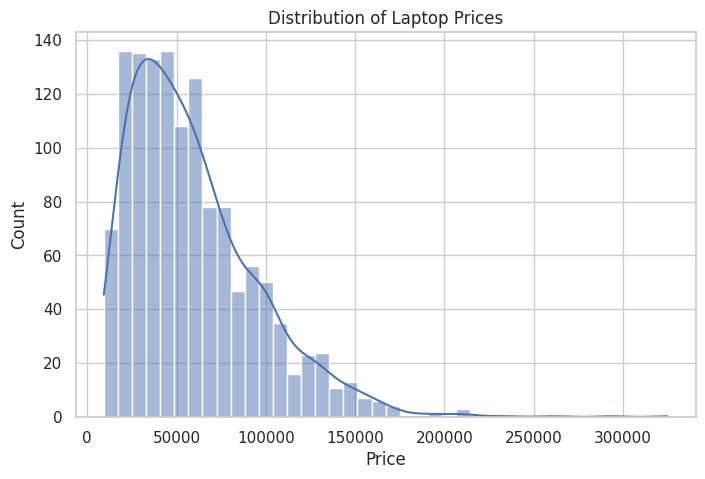

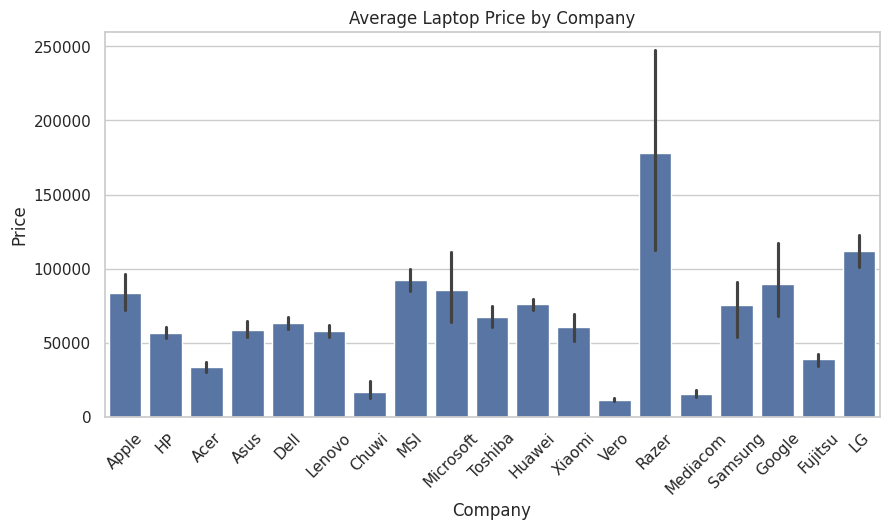

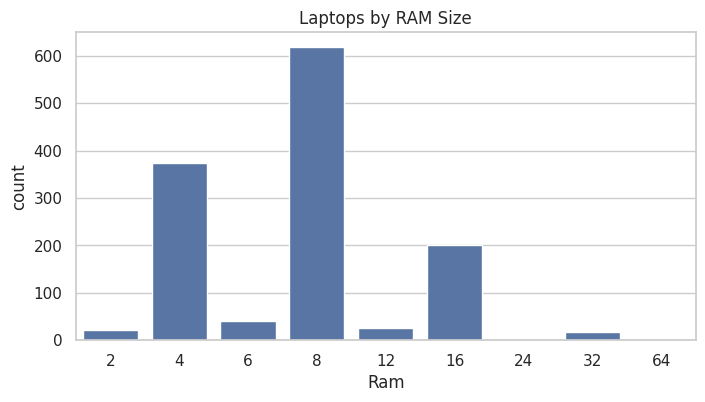

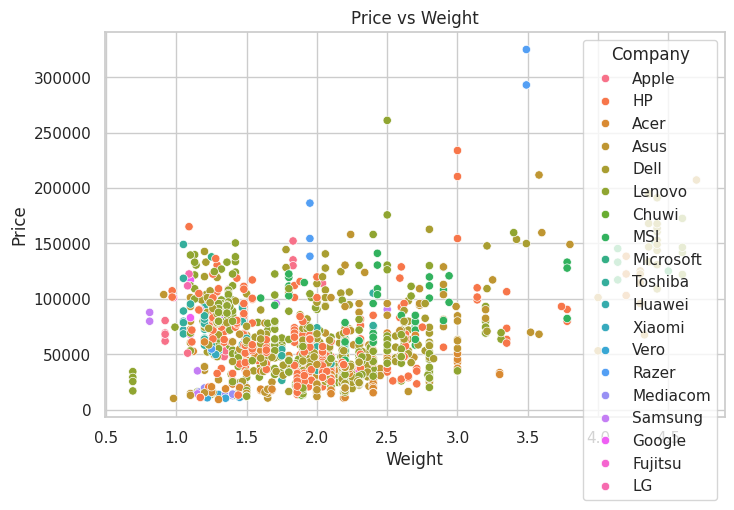

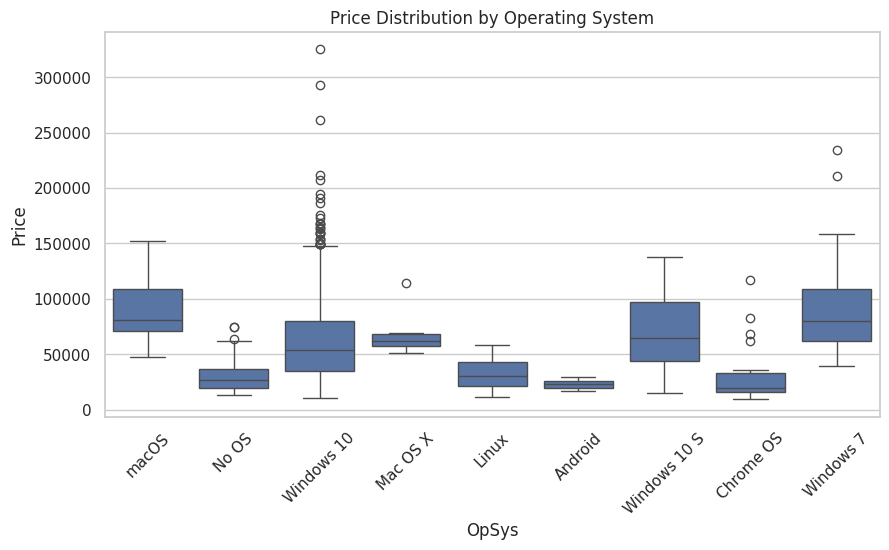

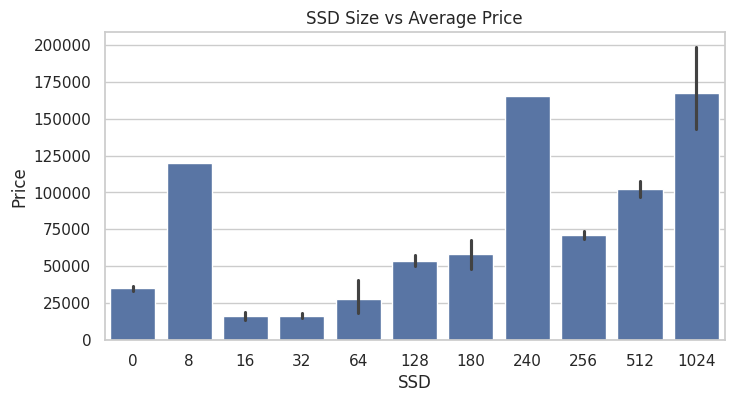

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=40, kde=True)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price")
plt.show()

# 2. Average Price by Brand
plt.figure(figsize=(10,5))
sns.barplot(x=df['Company'], y=df['Price'])
plt.title("Average Laptop Price by Company")
plt.xticks(rotation=45)
plt.show()

# 3. Countplot by RAM
plt.figure(figsize=(8,4))
sns.countplot(x='Ram', data=df)
plt.title("Laptops by RAM Size")
plt.show()

# 4. Scatterplot: Weight vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Weight', y='Price', hue='Company')
plt.title("Price vs Weight")
plt.show()

# 5. Boxplot: Price by Operating System
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='OpSys', y='Price')
plt.title("Price Distribution by Operating System")
plt.xticks(rotation=45)
plt.show()

# 6. Barplot: SSD vs Average Price
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='SSD', y='Price')
plt.title("SSD Size vs Average Price")
plt.show()
